# Decision Trees Introduction

Decision tree learning uses a decision tree (as a predictive model) to go from observations about an item (represented in the branches) to conclusions about the item's target value (represented in the leaves). Tree models where the target variable can take a discrete set of values are called classification trees; in these tree structures, leaves represent class labels and branches represent conjunctions of features that lead to those class labels. Decision trees where the target variable can take continuous values (typically real numbers) are called regression trees.

Decision trees used in data mining are of two main types:

* Classification tree analysis is when the predicted outcome is the class to which the data belongs.
* Regression tree analysis is when the predicted outcome can be considered a real number (e.g. the price of a house, or a patient's length of stay in a hospital).

The term Classification And Regression Tree (CART) analysis is an umbrella term used to refer to both of the above procedures, first introduced by Breiman et al.Trees used for regression and trees used for classification have some similarities - but also some differences, such as the procedure used to determine where to split.

Some techniques, often called **ensemble methods**, construct more than one decision tree:

Boosted trees Incrementally building an ensemble by training each new instance to emphasize the training instances previously mis-modeled. A typical example is AdaBoost. These can be used for regression-type and classification-type problems.
Bootstrap aggregated (or bagged) decision trees, an early ensemble method, builds multiple decision trees by repeatedly resampling training data with replacement, and voting the trees for a consensus prediction.
* A random forest classifier is a specific type of bootstrap aggregating
* Rotation forest - in which every decision tree is trained by first applying principal component analysis (PCA) on a random subset of the input features.
* Ensemble models such as random forest models and gradient boosted decision tree-based ensembles are some of the most powerful and popular approaches for solving classification, regression and ranking type problems. Deep learning approaches are starting to catch up  and overtake DT-based approaches  in some domains. 

## Lab Goals
In this lab, you will discover how to:

* Apply  the Classification And Regression Tree algorithm to a variety of problems
* Experiment with different types of  ensembles of decision trees
* implement the Classification And Regression Tree algorithm from scratch with Python



# Setup

First, let's make sure this notebook works well in both python 2 and 3, import a few common modules, ensure MatplotLib plots figures inline and prepare a function to save the figures:

In [4]:
# To support both python 2 and python 3
from __future__ import division, print_function, unicode_literals

# Common imports
import numpy as np
import os

# to make this notebook's output stable across runs
np.random.seed(42)

# To plot pretty figures
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt
plt.rcParams['axes.labelsize'] = 14
plt.rcParams['xtick.labelsize'] = 12
plt.rcParams['ytick.labelsize'] = 12


# Applying DTs for Classification
## Training and visualizing

### Plot a decision tree
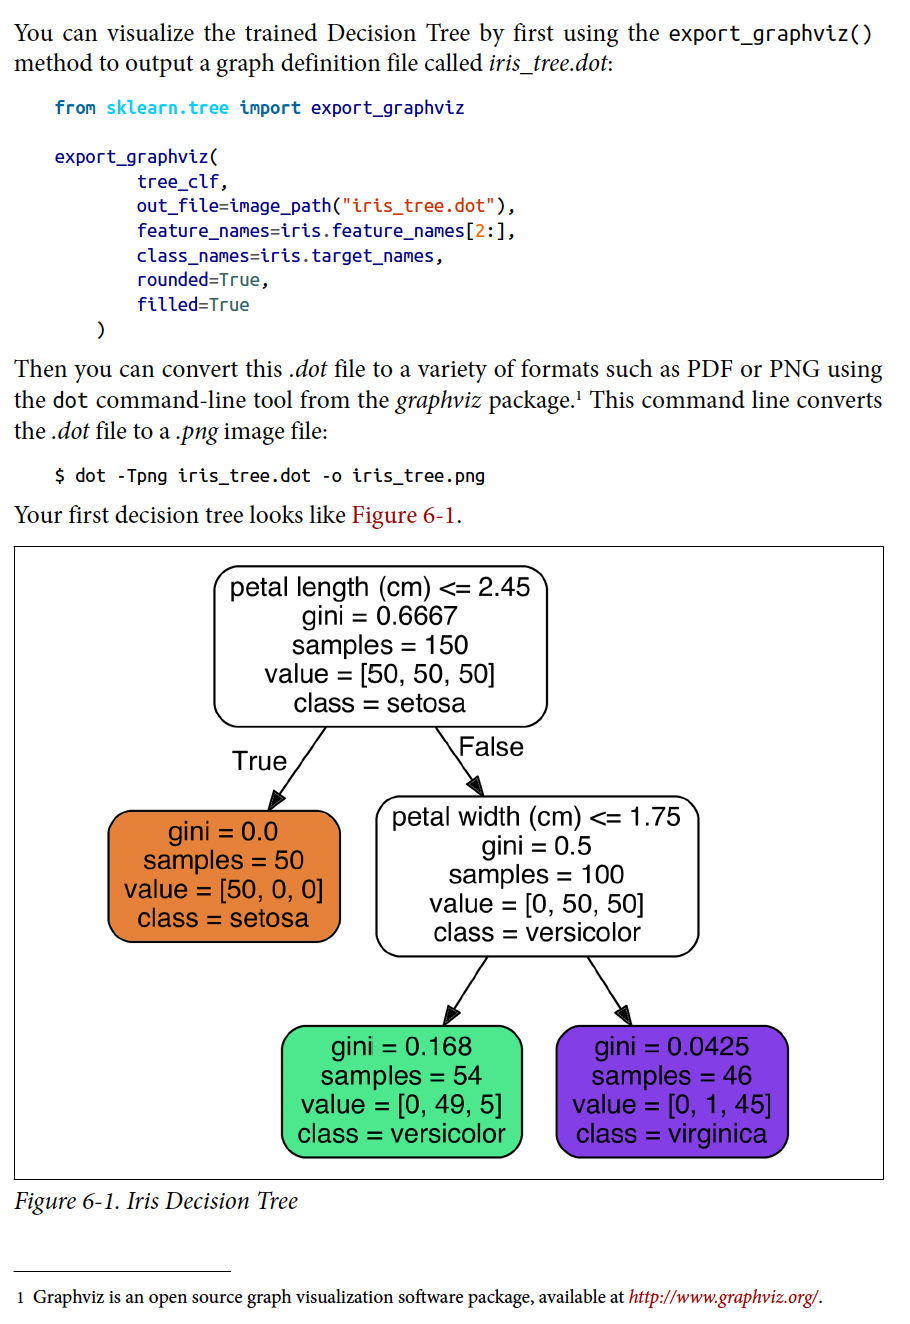

In [5]:
from sklearn.tree import export_graphviz

export_graphviz(
        tree_clf,
        out_file="iris_tree.dot",
        feature_names=iris.feature_names[2:],
        class_names=iris.target_names,
        rounded=True,
        filled=True
    )

NameError: name 'tree_clf' is not defined

### plot_decision_boundary

In [6]:
from sklearn.datasets import load_iris
from sklearn.tree import DecisionTreeClassifier

iris = load_iris()
X = iris.data[:, 2:] # petal length and width
y = iris.target

tree_clf = DecisionTreeClassifier(max_depth=2, random_state=42)
tree_clf.fit(X, y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=2,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=42,
            splitter='best')

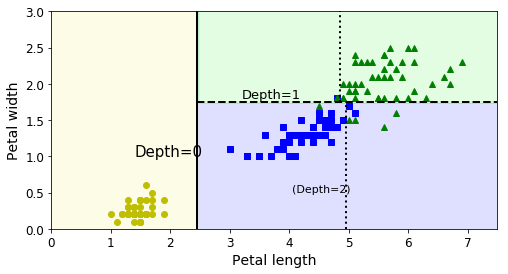

In [7]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[0, 7.5, 0, 3], iris=True, legend=False, plot_training=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if not iris:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    if plot_training:
        plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", label="Iris-Setosa")
        plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", label="Iris-Versicolor")
        plt.plot(X[:, 0][y==2], X[:, 1][y==2], "g^", label="Iris-Virginica")
        plt.axis(axes)
    if iris:
        plt.xlabel("Petal length", fontsize=14)
        plt.ylabel("Petal width", fontsize=14)
    else:
        plt.xlabel(r"$x_1$", fontsize=18)
        plt.ylabel(r"$x_2$", fontsize=18, rotation=0)
    if legend:
        plt.legend(loc="lower right", fontsize=14)

plt.figure(figsize=(8, 4))
plot_decision_boundary(tree_clf, X, y)
plt.plot([2.45, 2.45], [0, 3], "k-", linewidth=2)
plt.plot([2.45, 7.5], [1.75, 1.75], "k--", linewidth=2)
plt.plot([4.95, 4.95], [0, 1.75], "k:", linewidth=2)
plt.plot([4.85, 4.85], [1.75, 3], "k:", linewidth=2)
plt.text(1.40, 1.0, "Depth=0", fontsize=15)
plt.text(3.2, 1.80, "Depth=1", fontsize=13)
plt.text(4.05, 0.5, "(Depth=2)", fontsize=11)

plt.show()

## Predicting classes and class probabilities

In [8]:
tree_clf.predict_proba([[5, 1.5]])

array([[ 0.        ,  0.90740741,  0.09259259]])

In [9]:
tree_clf.predict([[5, 1.5]])

array([1])

## Sensitivity to training set details

Hopefully by now you are convinced that Decision Trees have a lot going for them:
they are simple to understand and interpret, easy to use, versatile, and powerful.
However they do have a few limitations. First, as you may have noticed, Decision
Trees love orthogonal decision boundaries (all splits are perpendicular to an axis),
which makes them sensitive to training set rotation. For example, the  example below (two moons)  shows a
simple linearly separable dataset: on the left, a Decision Tree can split it easily, while
on the right, after the dataset is rotated by 45°, the decision boundary looks unnecessarily
convoluted. Although both Decision Trees fit the training set perfectly, it is very
likely that the model on the right will not generalize well.

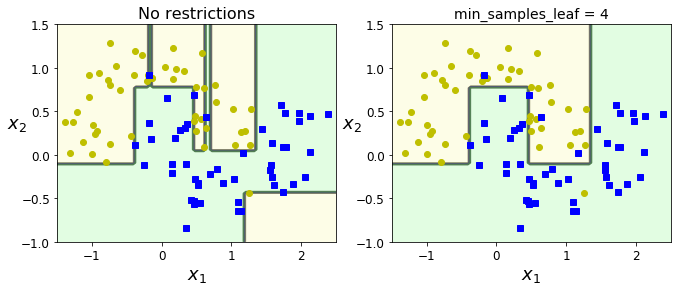

In [10]:
from sklearn.datasets import make_moons
Xm, ym = make_moons(n_samples=100, noise=0.25, random_state=53)

deep_tree_clf1 = DecisionTreeClassifier(random_state=42)
deep_tree_clf2 = DecisionTreeClassifier(min_samples_leaf=4, random_state=42)
deep_tree_clf1.fit(Xm, ym)
deep_tree_clf2.fit(Xm, ym)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(deep_tree_clf1, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("No restrictions", fontsize=16)
plt.subplot(122)
plot_decision_boundary(deep_tree_clf2, Xm, ym, axes=[-1.5, 2.5, -1, 1.5], iris=False)
plt.title("min_samples_leaf = {}".format(deep_tree_clf2.min_samples_leaf), fontsize=14)

plt.show()

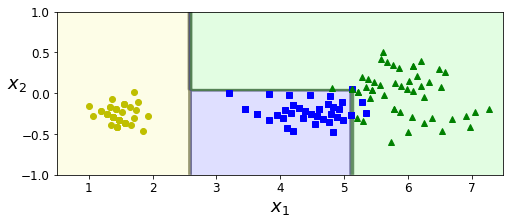

In [11]:
angle = np.pi / 180 * 20
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xr = X.dot(rotation_matrix)

tree_clf_r = DecisionTreeClassifier(random_state=42)
tree_clf_r.fit(Xr, y)

plt.figure(figsize=(8, 3))
plot_decision_boundary(tree_clf_r, Xr, y, axes=[0.5, 7.5, -1.0, 1], iris=False)

plt.show()

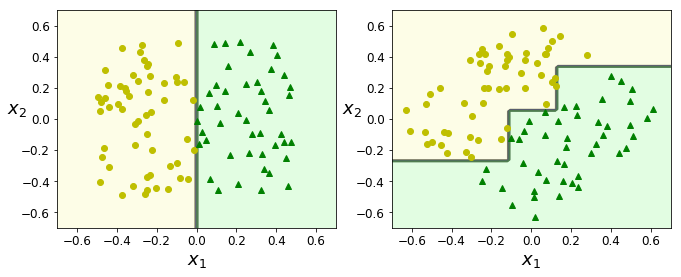

In [12]:
import numpy as np
np.random.seed(6)
Xs = np.random.rand(100, 2) - 0.5
ys = (Xs[:, 0] > 0).astype(np.float32) * 2

angle = np.pi / 4
rotation_matrix = np.array([[np.cos(angle), -np.sin(angle)], [np.sin(angle), np.cos(angle)]])
Xsr = Xs.dot(rotation_matrix)

tree_clf_s = DecisionTreeClassifier(random_state=42)
tree_clf_s.fit(Xs, ys)
tree_clf_sr = DecisionTreeClassifier(random_state=42)
tree_clf_sr.fit(Xsr, ys)

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_decision_boundary(tree_clf_s, Xs, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)
plt.subplot(122)
plot_decision_boundary(tree_clf_sr, Xsr, ys, axes=[-0.7, 0.7, -0.7, 0.7], iris=False)

plt.show()

# Applying DTs: Regression trees

In [13]:
# Quadratic training set + noise
np.random.seed(42)
m = 200
X = np.random.rand(m, 1)
y = 4 * (X - 0.5) ** 2
y = y + np.random.randn(m, 1) / 10

In [14]:
from sklearn.tree import DecisionTreeRegressor

tree_reg = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

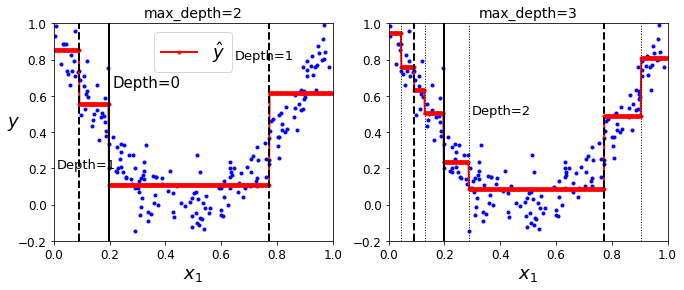

In [15]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(random_state=42, max_depth=2)
tree_reg2 = DecisionTreeRegressor(random_state=42, max_depth=3)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

def plot_regression_predictions(tree_reg, X, y, axes=[0, 1, -0.2, 1], ylabel="$y$"):
    x1 = np.linspace(axes[0], axes[1], 500).reshape(-1, 1)
    y_pred = tree_reg.predict(x1)
    plt.axis(axes)
    plt.xlabel("$x_1$", fontsize=18)
    if ylabel:
        plt.ylabel(ylabel, fontsize=18, rotation=0)
    plt.plot(X, y, "b.")
    plt.plot(x1, y_pred, "r.-", linewidth=2, label=r"$\hat{y}$")

plt.figure(figsize=(11, 4))
plt.subplot(121)
plot_regression_predictions(tree_reg1, X, y)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
plt.text(0.21, 0.65, "Depth=0", fontsize=15)
plt.text(0.01, 0.2, "Depth=1", fontsize=13)
plt.text(0.65, 0.8, "Depth=1", fontsize=13)
plt.legend(loc="upper center", fontsize=18)
plt.title("max_depth=2", fontsize=14)

plt.subplot(122)
plot_regression_predictions(tree_reg2, X, y, ylabel=None)
for split, style in ((0.1973, "k-"), (0.0917, "k--"), (0.7718, "k--")):
    plt.plot([split, split], [-0.2, 1], style, linewidth=2)
for split in (0.0458, 0.1298, 0.2873, 0.9040):
    plt.plot([split, split], [-0.2, 1], "k:", linewidth=1)
plt.text(0.3, 0.5, "Depth=2", fontsize=13)
plt.title("max_depth=3", fontsize=14)

plt.show()

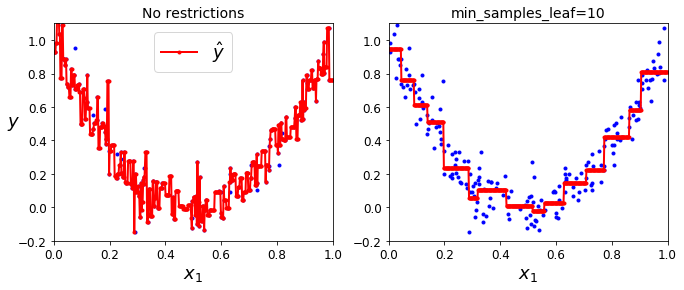

In [16]:
tree_reg1 = DecisionTreeRegressor(random_state=42)
tree_reg2 = DecisionTreeRegressor(random_state=42, min_samples_leaf=10)
tree_reg1.fit(X, y)
tree_reg2.fit(X, y)

x1 = np.linspace(0, 1, 500).reshape(-1, 1)
y_pred1 = tree_reg1.predict(x1)
y_pred2 = tree_reg2.predict(x1)

plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred1, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.ylabel("$y$", fontsize=18, rotation=0)
plt.legend(loc="upper center", fontsize=18)
plt.title("No restrictions", fontsize=14)

plt.subplot(122)
plt.plot(X, y, "b.")
plt.plot(x1, y_pred2, "r.-", linewidth=2, label=r"$\hat{y}$")
plt.axis([0, 1, -0.2, 1.1])
plt.xlabel("$x_1$", fontsize=18)
plt.title("min_samples_leaf={}".format(tree_reg2.min_samples_leaf), fontsize=14)

plt.show()

# Ensembles models
A group of predictors is called an ensemble; thus, this technique is called Ensemble Learning, and an
Ensemble Learning algorithm is called an Ensemble method.
For example, you can train a group of Decision Tree classifiers, each on a different
random subset of the training set. To make predictions, you just obtain the predictions
of all individual trees, then predict the class that gets the most votes. Such an ensemble of Decision Trees is called a Bagging based decision tree ensemble. Another example of an ensemble of DTs is the random forest approach,
and despite its simplicity, this is one of the most powerful Machine Learning algorithms
available today. We will look at other ensemble methods also in this section.

## Kitchen sink: Voting classifiers everything but the Kitchen sink
In this section, we implement a voting classifier. Think of this as means of implementing an "everything but the kitchen sink".

 
### Kitchen sink
Kitchen sink refers to an ensemble approach, where you might combine many different ML pipelines in an ensemble fashion (e.g., weighted sum). For example, one pipeline could be random forest-based, another could be linear regression-based, and yet another could be deep learning-based. Combining all three pipelines into one model would result in an-every-thing-but-the-kitchen-sink approach. Generally, this type of ensemble yields a couple of percentage points improvement over the individual pipelines when used in isolation.



### Generate some data

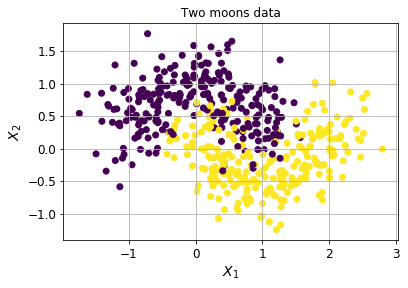

In [17]:
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_moons

X, y = make_moons(n_samples=500, noise=0.30, random_state=42)
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)
plt.scatter(X[:,0], X[:,1], c=y, label = y)
plt.xlabel('$X_1$')
plt.ylabel('$X_2$')
plt.title('Two moons data')
plt.grid()

### Ensemble of logistic regression, SVM, and Random forest

Suppose you have trained a few classifiers, each one achieving about 80% accuracy.
You may have a Logistic Regression classifier, an SVM classifier, a Random Forest
classifier, a K-Nearest Neighbors classifier, and perhaps a few more. 

Train diverse predictors as follows: 


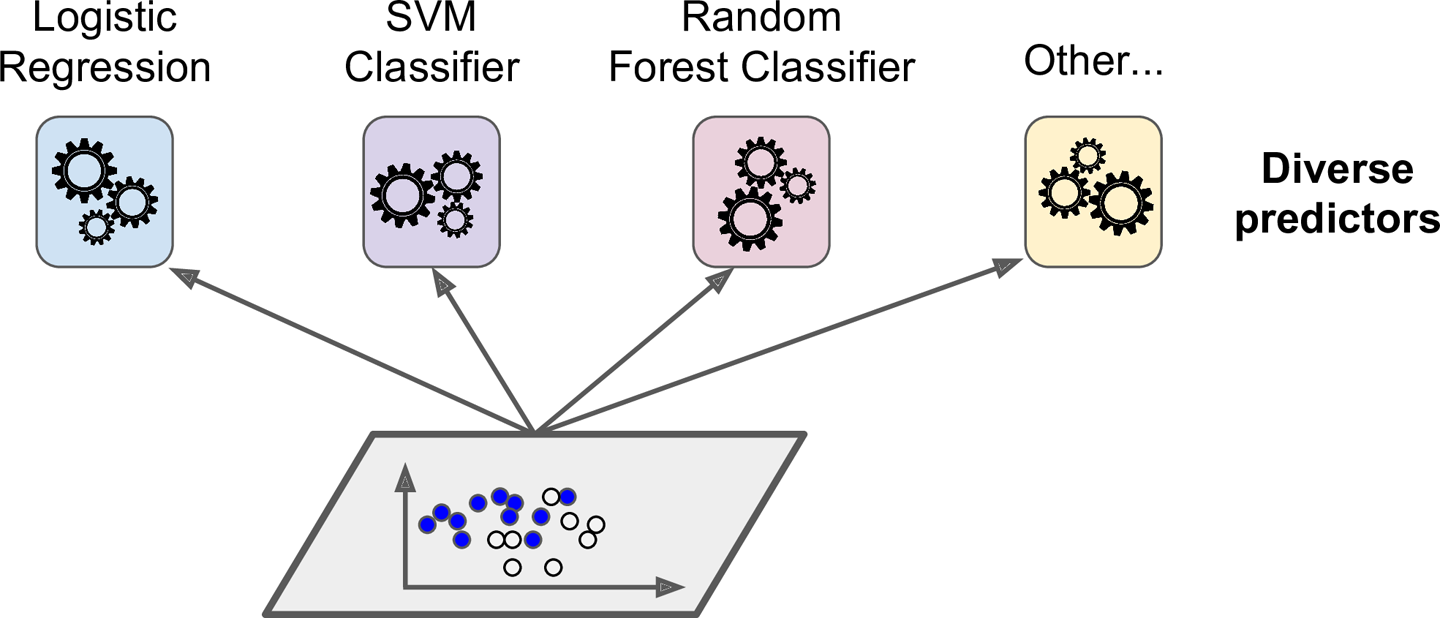


A very simple way to create an even better classifier is to aggregate the predictions of
each classifier and predict the class that gets the most votes. This majority-vote classifier
is called a hard voting classifier: 

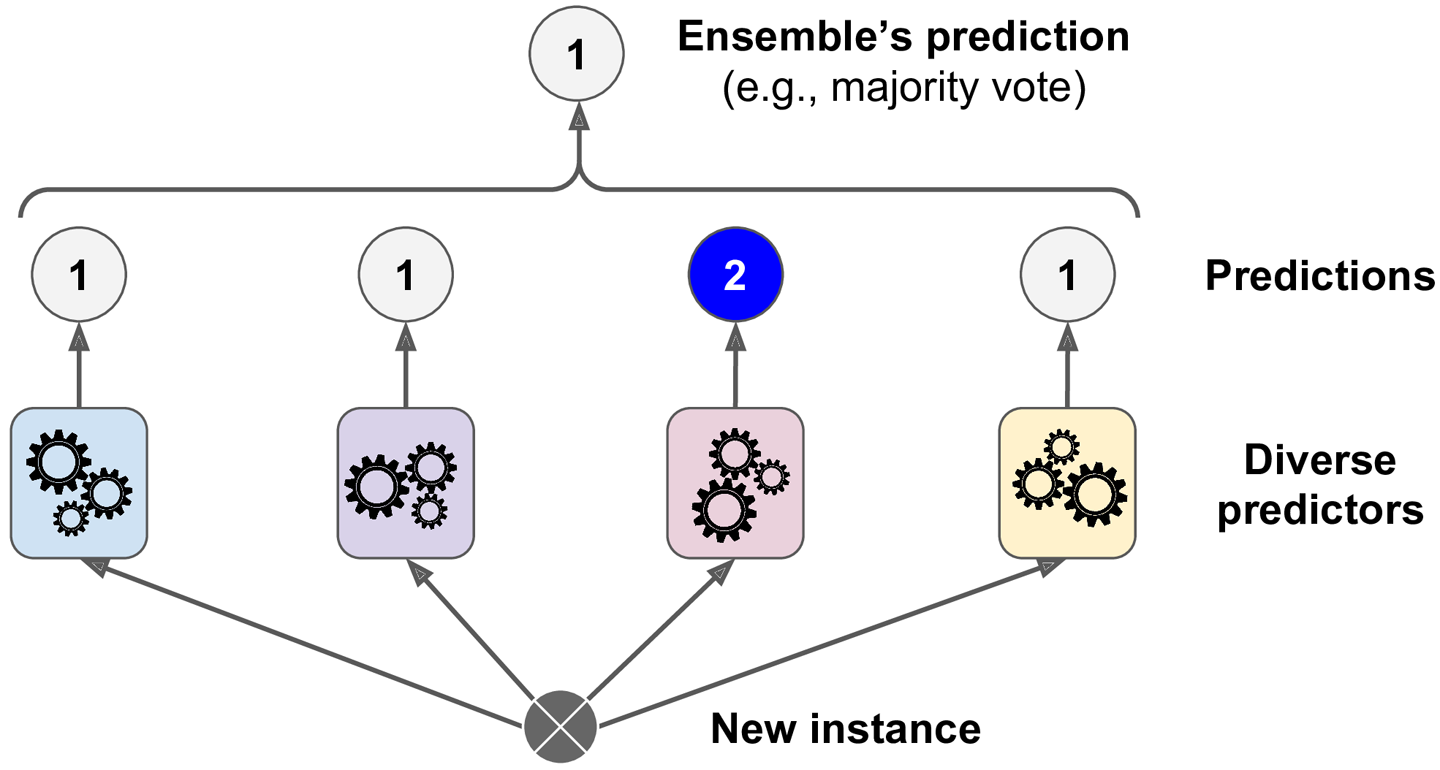

### Hard Ensemble (majority vote)

In [83]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import VotingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='hard')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...f',
  max_iter=-1, probability=False, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='hard', weights=None)

In [84]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.896


### Soft ensemble
If all classifiers are able to estimate class probabilities (i.e., they have a pre
dict_proba() method), then you can tell Scikit-Learn to predict the class with the
highest class probability, averaged over all the individual classifiers. This is called soft
voting. It often achieves higher performance than hard voting because it gives more
weight to highly confident votes. All you need to do is replace voting="hard" with
voting="soft" and ensure that all classifiers can estimate class probabilities. This

In [85]:
log_clf = LogisticRegression(random_state=42)
rnd_clf = RandomForestClassifier(random_state=42)
svm_clf = SVC(probability=True, random_state=42)

voting_clf = VotingClassifier(
    estimators=[('lr', log_clf), ('rf', rnd_clf), ('svc', svm_clf)],
    voting='soft')
voting_clf.fit(X_train, y_train)

VotingClassifier(estimators=[('lr', LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=42, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)), ('rf', RandomFor...bf',
  max_iter=-1, probability=True, random_state=42, shrinking=True,
  tol=0.001, verbose=False))],
         flatten_transform=None, n_jobs=1, voting='soft', weights=None)

In [86]:
from sklearn.metrics import accuracy_score

for clf in (log_clf, rnd_clf, svm_clf, voting_clf):
    clf.fit(X_train, y_train)
    y_pred = clf.predict(X_test)
    print(clf.__class__.__name__, accuracy_score(y_test, y_pred))

LogisticRegression 0.864
RandomForestClassifier 0.872
SVC 0.888
VotingClassifier 0.912


## Bagging ensembles

One way to get a diverse set of classifiers is to use very different training algorithms,
as just discussed. Another approach is to use the same training algorithm for every
predictor, but to train them on different random subsets of the training set. When
sampling is performed with replacement, this method is called **bagging** (short for
**bootstrap aggregating**). When sampling is performed without replacement, it is called
**pasting**.


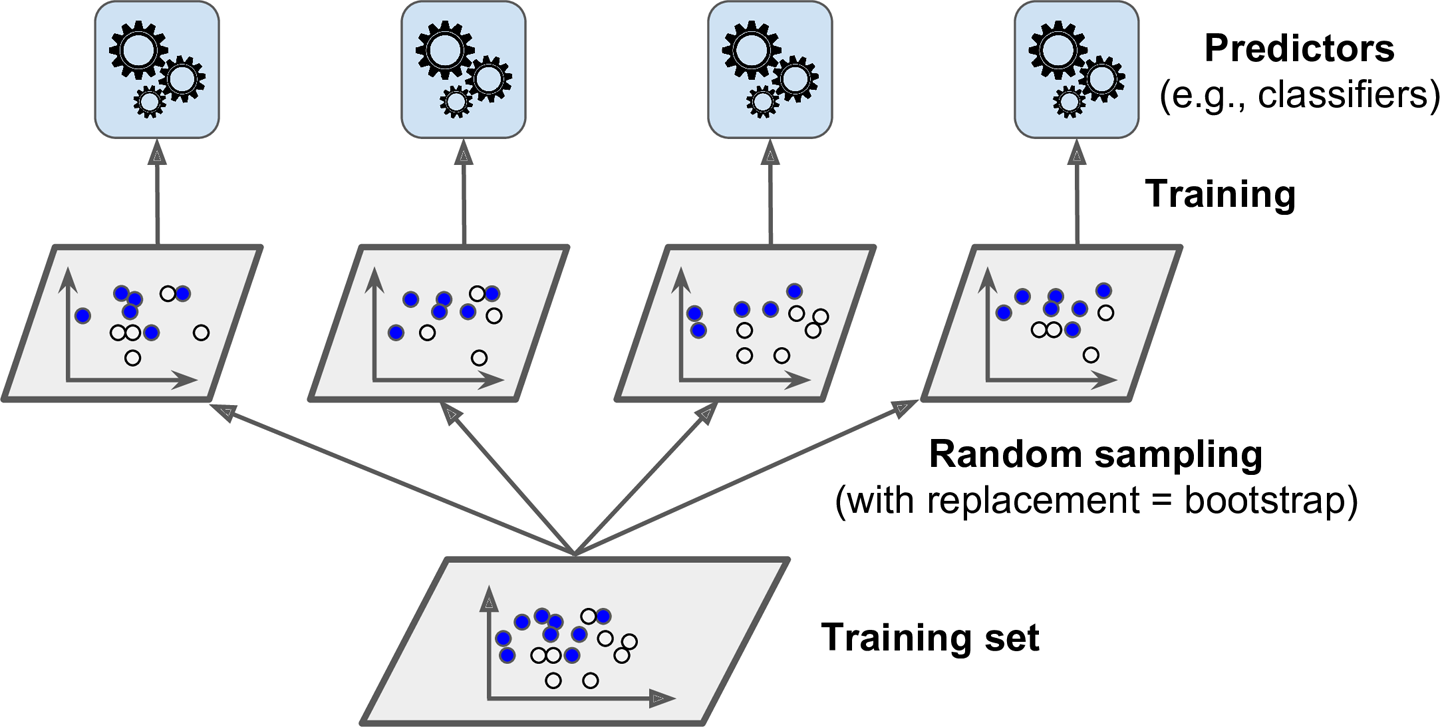


In [87]:
from sklearn.ensemble import BaggingClassifier
from sklearn.tree import DecisionTreeClassifier

bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=42), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=42)
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [88]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_test, y_pred))

0.904


In [89]:
tree_clf = DecisionTreeClassifier(random_state=42)
tree_clf.fit(X_train, y_train)
y_pred_tree = tree_clf.predict(X_test)
print(accuracy_score(y_test, y_pred_tree))

0.856


In [90]:
from matplotlib.colors import ListedColormap

def plot_decision_boundary(clf, X, y, axes=[-1.5, 2.5, -1, 1.5], alpha=0.5, contour=True):
    x1s = np.linspace(axes[0], axes[1], 100)
    x2s = np.linspace(axes[2], axes[3], 100)
    x1, x2 = np.meshgrid(x1s, x2s)
    X_new = np.c_[x1.ravel(), x2.ravel()]
    y_pred = clf.predict(X_new).reshape(x1.shape)
    custom_cmap = ListedColormap(['#fafab0','#9898ff','#a0faa0'])
    plt.contourf(x1, x2, y_pred, alpha=0.3, cmap=custom_cmap, linewidth=10)
    if contour:
        custom_cmap2 = ListedColormap(['#7d7d58','#4c4c7f','#507d50'])
        plt.contour(x1, x2, y_pred, cmap=custom_cmap2, alpha=0.8)
    plt.plot(X[:, 0][y==0], X[:, 1][y==0], "yo", alpha=alpha)
    plt.plot(X[:, 0][y==1], X[:, 1][y==1], "bs", alpha=alpha)
    plt.axis(axes)
    plt.xlabel(r"$x_1$", fontsize=18)
    plt.ylabel(r"$x_2$", fontsize=18, rotation=0)

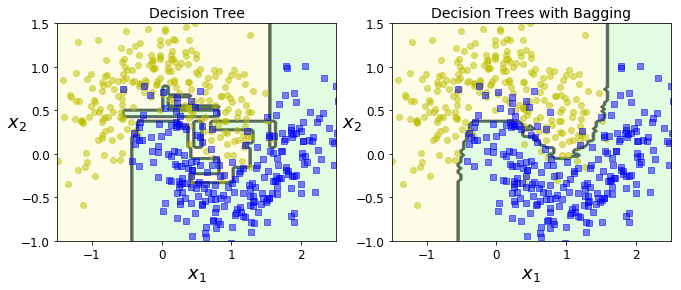

In [91]:
plt.figure(figsize=(11,4))
plt.subplot(121)
plot_decision_boundary(tree_clf, X, y)
plt.title("Decision Tree", fontsize=14)
plt.subplot(122)
plot_decision_boundary(bag_clf, X, y)
plt.title("Decision Trees with Bagging", fontsize=14)
plt.show()

## Random Forests

### Using the two moons datasets (train and test)

In [92]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(splitter="random", max_leaf_nodes=16, random_state=42),
    n_estimators=500, max_samples=1.0, bootstrap=True, n_jobs=-1, random_state=42)

In [93]:
bag_clf.fit(X_train, y_train)
y_pred = bag_clf.predict(X_test)

In [94]:
from sklearn.ensemble import RandomForestClassifier

rnd_clf = RandomForestClassifier(n_estimators=500, max_leaf_nodes=16, n_jobs=-1, random_state=42)
rnd_clf.fit(X_train, y_train)

y_pred_rf = rnd_clf.predict(X_test)

In [95]:
np.sum(y_pred == y_pred_rf) / len(y_pred)  # almost identical predictions

0.97599999999999998

### Using the Iris datasets

In [96]:
from sklearn.datasets import load_iris
iris = load_iris()
rnd_clf = RandomForestClassifier(n_estimators=500, n_jobs=-1, random_state=42)
rnd_clf.fit(iris["data"], iris["target"])
for name, score in zip(iris["feature_names"], rnd_clf.feature_importances_):
    print(name, score)

sepal length (cm) 0.112492250999
sepal width (cm) 0.0231192882825
petal length (cm) 0.441030464364
petal width (cm) 0.423357996355


#### Feature Importance
Yet another great quality of Random Forests is that they make it easy to measure the
relative importance of each feature. Scikit-Learn measures a feature’s importance by
looking at how much the tree nodes that use that feature reduce impurity on average
(across all trees in the forest). More precisely, it is a weighted average, where each
node’s weight is equal to the number of training samples that are associated with it.

In [97]:
rnd_clf.feature_importances_

array([ 0.11249225,  0.02311929,  0.44103046,  0.423358  ])

### MNIST via RF with variable importance

In [59]:
from sklearn.datasets import fetch_mldata
mnist = fetch_mldata('MNIST original')

In [60]:
rnd_clf = RandomForestClassifier(random_state=42)
rnd_clf.fit(mnist["data"], mnist["target"])

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=42, verbose=0, warm_start=False)

In [61]:
def plot_digit(data):
    image = data.reshape(28, 28)
    plt.imshow(image, cmap = matplotlib.cm.hot,
               interpolation="nearest")
    plt.axis("off")

#### Plot Feature Importance for each pixel

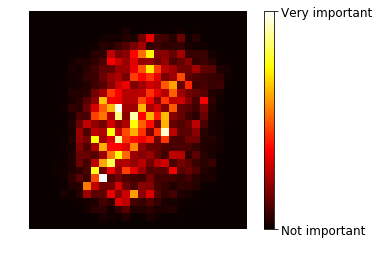

In [63]:
plot_digit(rnd_clf.feature_importances_)

cbar = plt.colorbar(ticks=[rnd_clf.feature_importances_.min(), rnd_clf.feature_importances_.max()])
cbar.ax.set_yticklabels(['Not important', 'Very important'])

plt.show()

## Gradient Boosting for regression
 Another very popular Boosting algorithm is Gradient Boosting. Just like AdaBoost,
Gradient Boosting works by sequentially adding predictors to an ensemble, each one
correcting its predecessor. However, instead of tweaking the instance weights at every
iteration like AdaBoost does, this method tries to fit the new predictor to the residual
errors made by the previous predictor.

Let’s go through a simple regression example using Decision Trees as the base predictors
(of course Gradient Boosting also works great with regression tasks). This is
called Gradient Tree Boosting, or Gradient Boosted Regression Trees (GBRT). First, let’s
fit a DecisionTreeRegressor to the training set (for example, a noisy quadratic training
set):

In [98]:
np.random.seed(42)
X = np.random.rand(100, 1) - 0.5
y = 3*X[:, 0]**2 + 0.05 * np.random.randn(100)

In [99]:
from sklearn.tree import DecisionTreeRegressor

tree_reg1 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg1.fit(X, y)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

** Now train a second DecisionTreeRegressor on the residual errors made by the first
predictor:**

In [100]:
y2 = y - tree_reg1.predict(X)
tree_reg2 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg2.fit(X, y2)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

** Now train a third DecisionTreeRegressor on the residual errors made by the second
predictor:**

In [101]:
y3 = y2 - tree_reg2.predict(X)
tree_reg3 = DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg3.fit(X, y3)

DecisionTreeRegressor(criterion='mse', max_depth=2, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=42, splitter='best')

In [102]:
X_new = np.array([[0.8]])

### Prediction using GBDT model
Now we have an ensemble containing three trees. It can make predictions on a new
instance simply by adding up the predictions of all the trees:

In [103]:
y_pred = sum(tree.predict(X_new) for tree in (tree_reg1, tree_reg2, tree_reg3))

In [104]:
y_pred

array([ 0.75026781])

### Plot the training data for each tree in the sequential ensemble

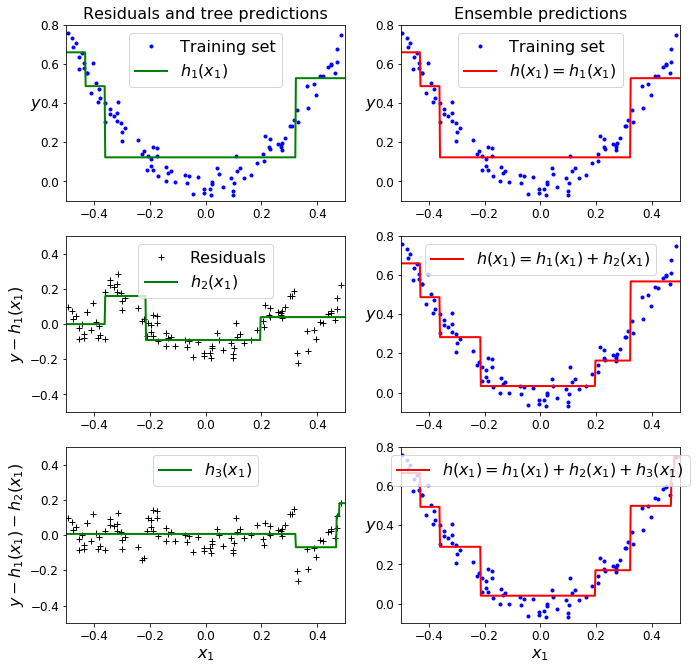

In [105]:
def plot_predictions(regressors, X, y, axes, label=None, style="r-", data_style="b.", data_label=None):
    x1 = np.linspace(axes[0], axes[1], 500)
    y_pred = sum(regressor.predict(x1.reshape(-1, 1)) for regressor in regressors)
    plt.plot(X[:, 0], y, data_style, label=data_label)
    plt.plot(x1, y_pred, style, linewidth=2, label=label)
    if label or data_label:
        plt.legend(loc="upper center", fontsize=16)
    plt.axis(axes)

plt.figure(figsize=(11,11))

plt.subplot(321)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h_1(x_1)$", style="g-", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Residuals and tree predictions", fontsize=16)

plt.subplot(322)
plot_predictions([tree_reg1], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1)$", data_label="Training set")
plt.ylabel("$y$", fontsize=16, rotation=0)
plt.title("Ensemble predictions", fontsize=16)

plt.subplot(323)
plot_predictions([tree_reg2], X, y2, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_2(x_1)$", style="g-", data_style="k+", data_label="Residuals")
plt.ylabel("$y - h_1(x_1)$", fontsize=16)

plt.subplot(324)
plot_predictions([tree_reg1, tree_reg2], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1)$")
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.subplot(325)
plot_predictions([tree_reg3], X, y3, axes=[-0.5, 0.5, -0.5, 0.5], label="$h_3(x_1)$", style="g-", data_style="k+")
plt.ylabel("$y - h_1(x_1) - h_2(x_1)$", fontsize=16)
plt.xlabel("$x_1$", fontsize=16)

plt.subplot(326)
plot_predictions([tree_reg1, tree_reg2, tree_reg3], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="$h(x_1) = h_1(x_1) + h_2(x_1) + h_3(x_1)$")
plt.xlabel("$x_1$", fontsize=16)
plt.ylabel("$y$", fontsize=16, rotation=0)

plt.show()

###  Scikit-Learn’s GradientBoostingRegressor
A simpler way to train GBRT ensembles is to use Scikit-Learn’s GradientBoostingRe
gressor class. Much like the RandomForestRegressor class, it has hyperparameters to
control the growth of Decision Trees (e.g., max_depth, min_samples_leaf, and so on),
as well as hyperparameters to control the ensemble training, such as the number of
trees (n_estimators). The following code creates the same ensemble as the previous
one:

In [106]:
from sklearn.ensemble import GradientBoostingRegressor

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=3, learning_rate=1.0, random_state=42)
gbrt.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=1.0, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=3, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [107]:
gbrt_slow = GradientBoostingRegressor(max_depth=2, n_estimators=200, learning_rate=0.1, random_state=42)
gbrt_slow.fit(X, y)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=200, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

### learning_rate hyperparameter
The learning_rate hyperparameter scales the contribution of each tree. If you set it
to a low value, such as 0.1, you will need more trees in the ensemble to fit the training
set, but the predictions will usually generalize better. This is a regularization technique
called shrinkage. The figure below shows two GBRT ensembles trained with a low
learning rate: the one on the left does not have enough trees to fit the training set,
while the one on the right has too many trees and overfits the training set.

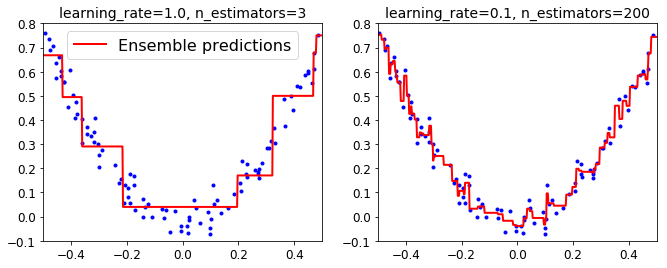

In [108]:
plt.figure(figsize=(11,4))

plt.subplot(121)
plot_predictions([gbrt], X, y, axes=[-0.5, 0.5, -0.1, 0.8], label="Ensemble predictions")
plt.title("learning_rate={}, n_estimators={}".format(gbrt.learning_rate, gbrt.n_estimators), fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_slow], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("learning_rate={}, n_estimators={}".format(gbrt_slow.learning_rate, gbrt_slow.n_estimators), fontsize=14)
plt.show()

### Gradient Boosting with Early stopping

It is also possible to implement early stopping by actually stopping training early
(instead of training a large number of trees first and then looking back to find the
optimal number). You can do so by setting warm_start=True, which makes Scikit-
Learn keep existing trees when the fit() method is called, allowing incremental
training. The following code stops training when the validation error does not
improve for five iterations in a row:

In [109]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error

X_train, X_val, y_train, y_val = train_test_split(X, y, random_state=49)

gbrt = GradientBoostingRegressor(max_depth=2, n_estimators=120, random_state=42)
gbrt.fit(X_train, y_train)

# test model to date on validation set
errors = [mean_squared_error(y_val, y_pred)
          for y_pred in gbrt.staged_predict(X_val)]
bst_n_estimators = np.argmin(errors)

gbrt_best = GradientBoostingRegressor(max_depth=2,n_estimators=bst_n_estimators, random_state=42)
gbrt_best.fit(X_train, y_train)

GradientBoostingRegressor(alpha=0.9, criterion='friedman_mse', init=None,
             learning_rate=0.1, loss='ls', max_depth=2, max_features=None,
             max_leaf_nodes=None, min_impurity_decrease=0.0,
             min_impurity_split=None, min_samples_leaf=1,
             min_samples_split=2, min_weight_fraction_leaf=0.0,
             n_estimators=55, presort='auto', random_state=42,
             subsample=1.0, verbose=0, warm_start=False)

In [110]:
min_error = np.min(errors)

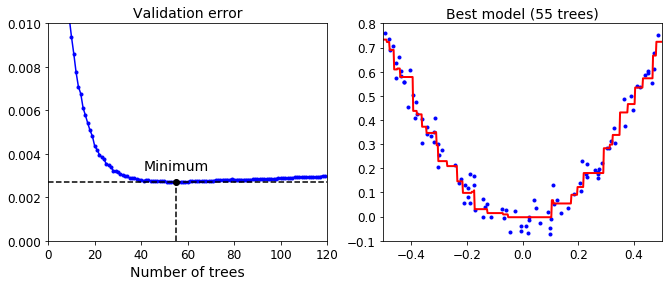

In [111]:
plt.figure(figsize=(11, 4))

plt.subplot(121)
plt.plot(errors, "b.-")
plt.plot([bst_n_estimators, bst_n_estimators], [0, min_error], "k--")
plt.plot([0, 120], [min_error, min_error], "k--")
plt.plot(bst_n_estimators, min_error, "ko")
plt.text(bst_n_estimators, min_error*1.2, "Minimum", ha="center", fontsize=14)
plt.axis([0, 120, 0, 0.01])
plt.xlabel("Number of trees")
plt.title("Validation error", fontsize=14)

plt.subplot(122)
plot_predictions([gbrt_best], X, y, axes=[-0.5, 0.5, -0.1, 0.8])
plt.title("Best model (%d trees)" % bst_n_estimators, fontsize=14)
plt.show()

In [112]:
gbrt = GradientBoostingRegressor(max_depth=2, warm_start=True, random_state=42)

min_val_error = float("inf")
error_going_up = 0
for n_estimators in range(1, 120):
    gbrt.n_estimators = n_estimators
    gbrt.fit(X_train, y_train)
    y_pred = gbrt.predict(X_val)
    val_error = mean_squared_error(y_val, y_pred)
    if val_error < min_val_error:
        min_val_error = val_error
        error_going_up = 0
    else:
        error_going_up += 1
        if error_going_up == 5:
            break  # early stopping

In [113]:
print(gbrt.n_estimators)

61


# Under the covers: Classification and Regression Trees

Decision trees are a powerful prediction method and extremely popular.

They are popular because the final model is so easy to understand by practitioners and domain experts alike. The final decision tree can explain exactly why a specific prediction was made, making it very attractive for operational use.

Decision trees also provide the foundation for more advanced ensemble methods such as bagging, random forests and gradient boosting.

Classification and Regression Trees or CART for short is an acronym introduced by Leo Breiman to refer to Decision Tree algorithms that can be used for classification or regression predictive modeling problems.

We will focus on using CART for classification in this tutorial.

The representation of the CART model is a binary tree. This is the same binary tree from algorithms and data structures, nothing too fancy (each node can have zero, one or two child nodes).

A node represents a single input variable (X) and a split point on that variable, assuming the variable is numeric. The leaf nodes (also called terminal nodes) of the tree contain an output variable (y) which is used to make a prediction.

Once created, a tree can be navigated with a new row of data following each branch with the splits until a final prediction is made.

Creating a binary decision tree is actually a process of dividing up the input space. A greedy approach is used to divide the space called recursive binary splitting. This is a numerical procedure where all the values are lined up and different split points are tried and tested using a cost function.

The split with the best cost (lowest cost because we minimize cost) is selected. All input variables and all possible split points are evaluated and chosen in a greedy manner based on the cost function.

Regression: The cost function that is minimized to choose split points is the sum squared error across all training samples that fall within the rectangle.
Classification: The Gini cost function is used which provides an indication of how pure the nodes are, where node purity refers to how mixed the training data assigned to each node is.
Splitting continues until nodes contain a minimum number of training examples or a maximum tree depth is reached.


This remainder of this section focuses on learning a classification decision tree using the GINI index to grow the tree. It is broken down into 5 parts:

1. Gini Index.
* Create Split.
* Build a Tree.
* Make a Prediction.
* Banknote Case Study.

These steps will give you the foundation that you need to implement the CART algorithm from scratch and apply it to your own predictive modeling problems.

In [114]:
sum([1, 0, 1, 2.25, 0.25, 0.25, 2.25])/7

1.0

## Mean model as a predictor

Given a supervised machine learning problem, be it classification or regression, and a corresponding training dataset set, it common to use a baseline model based on the mean value (or median) of the target variable. This mean value can be used as a prediction $\hat{y}$ for future test cases. Obviously, this mean value is a gross estimate leading to huge predictive errors (e.g., large MSE) in general. This mean model has no input variables. If we can partition the universe of the output variable into two or more mutually exclusive and exhaustive subsets and use the mean of each subset as the predictive proxy for data falling into that subset, we will reduce the overall predictive error. In general, in the case, of say, the MSE of mean model is always greater or at best equal to the MSE of the partitioned model. Consider a set of target values {1, 2, 3, 4, 5, 6, 7}. The mean of this set is 4, and the squared error  is {9, 4, 1, 0,1, 4,9}, and the corresponding MSE (which is equivalent to variance) is 4. If we can split the data (we will elaborate how to do this shortly) into the following two subsets: {1, 2, 3} and {4, 5, 6, 7} and construct the respective means of these subsets, we get 2 and 5.5 respectively. The squared error of the this model is {1, 0, 1} and {2.25, 0.25, 0.25, 2.25}, yielding an overall MSE of 1 (sum([1, 0, 1, 2.25, 0.25, 0.25, 2.25])/7). The global MSE has descreased radically for this small example from 4 to 1. A smilar logic can be followed for classification problem. There remains one detail that needs to be presented, that of, how can we partition the universe of the output varible to achieve such dramatic improvements in performance measures such as MSE? This can be accompished by using input variables to partition/cluster the universe of input data, and consequently the universe of the output variable into zones of that have similar output values thus leading to small predictive errors. 

Consider a case where we have two groups of data with just $2$ rows in each group. The rows in the first group all belong to class $0$ and the rows in the second group belong to class $1$, so it’s a perfect split.



(say MSE).often it can be useful to split the partition the dataset using an input feature such that Gini index is the name of the quality score or cost function used to evaluate the quality of splits in the dataset.

A split in the dataset involves one input attribute and one value for that attribute. It can be used to divide training patterns into two groups of rows.

A Gini score gives an idea of how good a split is by how mixed the classes are in the two groups created by the split. A perfect separation results in a Gini score of 0, whereas the worst case split that results in 50/50 classes in each group result in a Gini score of 0.5 (for a 2 class problem).

Calculating Gini is best demonstrated with an example.

## Gini Index Example
We have two groups of data with 2 rows in each group. The rows in the first group all belong to class 0 and the rows in the second group belong to class 1, so it’s a perfect split.

We first need to calculate the proportion of classes in each group.


proportion = count(class_value) / count(rows)

The proportions for this example would be:

* group_1_class_0 = 2 / 2 = 1
* group_1_class_1 = 0 / 2 = 0
* group_2_class_0 = 0 / 2 = 0
* group_2_class_1 = 2 / 2 = 1

Gini is then calculated for each child node as follows:

* gini_index = sum(proportion * (1.0 - proportion))
* gini_index = 1.0 - sum(proportion * proportion)

The Gini index for each group must then be weighted by the size of the group, relative to all of the samples in the parent, e.g. all samples that are currently being grouped. We can add this weighting to the Gini calculation for a group as follows:


* gini_index = (1.0 - sum(proportion * proportion)) * (group_size/total_samples)

In this example the Gini scores for each group are calculated as follows:

* Gini(group_1) = (1 - (1*1 + 0*0)) * 2/4
* Gini(group_1) = 0.0 * 0.5 
* Gini(group_1) = 0.0 
* Gini(group_2) = (1 - (0*0 + 1*1)) * 2/4
* Gini(group_2) = 0.0 * 0.5 
* Gini(group_2) = 0.0

The scores are then added across each child node at the split point to give a final Gini score for the split point that can be compared to other candidate split points.

The Gini for this split point would then be calculated as 0.0 + 0.0 or a perfect Gini score of 0.0.

Below is a function named gini_index() the calculates the Gini index for a list of groups and a list of known class values.

You can see that there are some safety checks in there to avoid a divide by zero for an empty group.

In [121]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
    # count all samples at split point
    n_instances = float(sum([len(group) for group in groups]))
    # sum weighted Gini index for each group
    gini = 0.0
    for group in groups:
        size = float(len(group))
        # avoid divide by zero
        if size == 0:
            continue
            
        score = 0.0
        # score the group based on the score for each class
        for class_val in classes:
             p = [row[-1] for row in group].count(class_val) / size
             score += p * p
        # weight the group score by its relative size
        gini += (1.0 - score) * (size / n_instances)
    return gini


We can test this function with our worked example above. We can also test it for the worst case of a 50/50 split in each group. The complete example is listed below.

In [122]:
# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# test Gini values
print(gini_index([[[1, 1], [1, 0]], [[1, 1], [1, 0]]], [0, 1]))
print(gini_index([[[1, 0], [1, 0]], [[1, 1], [1, 1]]], [0, 1]))

0.5
0.0


Running the example prints the two Gini scores, first the score for the worst case at 0.5 followed by the score for the best case at 0.0.

Now that we know how to evaluate the results of a split, let’s look at creating splits.



## Create Split

A split is comprised of an attribute in the dataset and a value.

We can summarize this as the index of an attribute to split and the value by which to split rows on that attribute. This is just a useful shorthand for indexing into rows of data.

Creating a split involves three parts, the first we have already looked at which is calculating the Gini score. The remaining two parts are:

Splitting a Dataset.
Evaluating All Splits.
Let’s take a look at each.

## Banknote Dataset

### Splitting a Dataset

Splitting a dataset means separating a dataset into two lists of rows given the index of an attribute and a split value for that attribute.

Once we have the two groups, we can then use our Gini score above to evaluate the cost of the split.

Splitting a dataset involves iterating over each row, checking if the attribute value is below or above the split value and assigning it to the left or right group respectively.

Below is a function named test_split() that implements this procedure.

In [123]:
# Split a dataset based on an attribute and an attribute value
# INPUTS
#    column index for variable
#    split value
#    dataset
# RETURN
#    2 data subsets (left subset and right subset)
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

Not much to it.

Note that the right group contains all rows with a value at the index above or equal to the split value.



### Evaluating All Splits

With the Gini function above and the test split function we now have everything we need to evaluate splits.

Given a dataset, we must check every value on each attribute as a candidate split, evaluate the cost of the split and find the best possible split we could make.

Once the best split is found, we can use it as a node in our decision tree.

This is an exhaustive and greedy algorithm.

We will use a dictionary to represent a node in the decision tree as we can store data by name. When selecting the best split and using it as a new node for the tree we will store the index of the chosen attribute, the value of that attribute by which to split and the two groups of data split by the chosen split point.

Each group of data is its own small dataset of just those rows assigned to the left or right group by the splitting process. You can imagine how we might split each group again, recursively as we build out our decision tree.

Below is a function named get_BEST_split() that implements this procedure. You can see that it iterates over each attribute (except the class value) and then each value for that attribute, splitting and evaluating splits as it goes.

The best split is recorded and then returned after all checks are complete.

In [124]:
# Select the best split point for a dataset
# RETURN the best variable, corresponding best split, score, data partition
def get_BEST_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None #Cache the best variable, split, score, data partition
	for index in range(len(dataset[0])-1): # for each column
		for row in dataset:                # for each example
			groups = test_split(index, row[index], dataset) #split column by this value; TODO make more efficent
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

We can contrive a small dataset to test out this function and our whole dataset splitting process.

We can plot this dataset using separate colors for each class. You can see that it would not be difficult to manually pick a value of X1 (x-axis on the plot) to split this dataset.


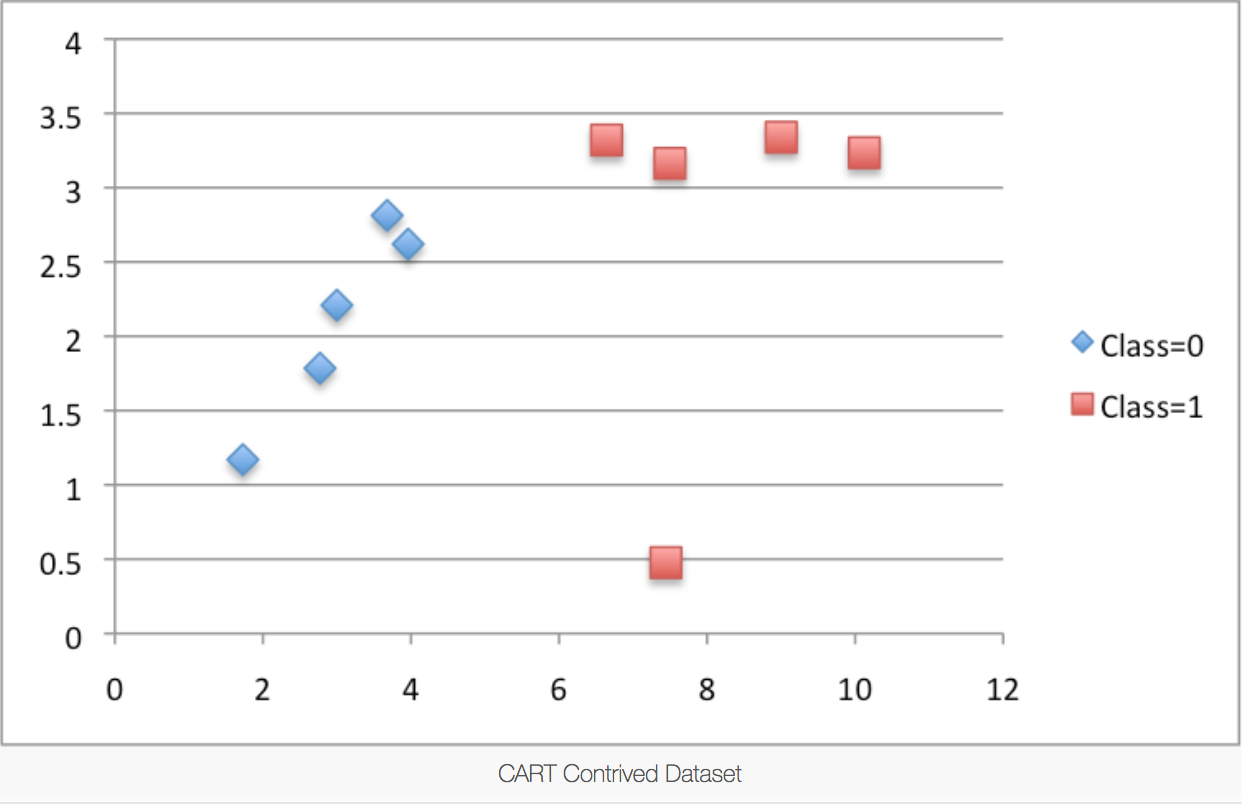

The example below puts all of this together.
The get_BEST_split() function was modified to print out each split point and it’s Gini index as it was evaluated.

Running the example prints all of the Gini scores and then prints the score of best split in the dataset of X1 < 6.642 with a Gini Index of 0.0 or a perfect split.

In [125]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset
def get_BEST_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			print('X%d < %.3f Gini=%.3f' % ((index+1), row[index], gini))
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
split = get_BEST_split(dataset)
print('Split: [X%d < %.3f]' % ((split['index']+1), split['value']))

X1 < 2.771 Gini=0.444
X1 < 1.729 Gini=0.500
X1 < 3.678 Gini=0.286
X1 < 3.961 Gini=0.167
X1 < 2.999 Gini=0.375
X1 < 7.498 Gini=0.286
X1 < 9.002 Gini=0.375
X1 < 7.445 Gini=0.167
X1 < 10.125 Gini=0.444
X1 < 6.642 Gini=0.000
X2 < 1.785 Gini=0.500
X2 < 1.170 Gini=0.444
X2 < 2.813 Gini=0.320
X2 < 2.620 Gini=0.417
X2 < 2.209 Gini=0.476
X2 < 3.163 Gini=0.167
X2 < 3.339 Gini=0.444
X2 < 0.477 Gini=0.500
X2 < 3.235 Gini=0.286
X2 < 3.320 Gini=0.375
Split: [X1 < 6.642]


Now that we know how to find the best split points in a dataset or list of rows, let’s see how we can use it to build out a decision tree.

## Build a Tree

Creating the root node of the tree is easy.

We call the above get_BEST_split() function using the entire dataset.

Adding more nodes to our tree is more interesting.

Building a tree may be divided into 3 main parts:

1) Terminal Nodes.

2) Recursive Splitting.

3) Building a Tree.


### Terminal Nodes

We need to decide when to stop growing a tree.

We can do that using the depth and the number of rows that the node is responsible for in the training dataset.

Maximum Tree Depth. This is the maximum number of nodes from the root node of the tree. Once a maximum depth of the tree is met, we must stop splitting adding new nodes. Deeper trees are more complex and are more likely to overfit the training data.
Minimum Node Records. This is the minimum number of training patterns that a given node is responsible for. Once at or below this minimum, we must stop splitting and adding new nodes. Nodes that account for too few training patterns are expected to be too specific and are likely to overfit the training data.
These two approaches will be user-specified arguments to our tree building procedure.

There is one more condition. It is possible to choose a split in which all rows belong to one group. In this case, we will be unable to continue splitting and adding child nodes as we will have no records to split on one side or another.

Now we have some ideas of when to stop growing the tree. When we do stop growing at a given point, that node is called a terminal node and is used to make a final prediction.

This is done by taking the group of rows assigned to that node and selecting the most common class value in the group. This will be used to make predictions.

Below is a function named to_terminal() that will select a class value for a group of rows. It returns the most common output value in a list of rows.

In [10]:
# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

### Recursive Splitting

We know how and when to create terminal nodes, now we can build our tree.

Building a decision tree involves calling the above developed get_BEST_split() function over and over again on the groups created for each node.

New nodes added to an existing node are called child nodes. A node may have zero children (a terminal node), one child (one side makes a prediction directly) or two child nodes. We will refer to the child nodes as left and right in the dictionary representation of a given node.

Once a node is created, we can create child nodes recursively on each group of data from the split by calling the same function again.

Below is a function that implements this recursive procedure. It takes a node as an argument as well as the maximum depth, minimum number of patterns in a node and the current depth of a node.

You can imagine how this might be first called passing in the root node and the depth of 1. This function is best explained in steps:

1) Firstly, the two groups of data split by the node are extracted for use and deleted from the node. As we work on these groups the node no longer requires access to these data.

2) Next, we check if either left or right group of rows is empty and if so we create a terminal node using what records we do have.

3) We then check if we have reached our maximum depth and if so we create a terminal node.

4) We then process the left child, creating a terminal node if the group of rows is too small, otherwise creating and adding the left node in a depth first fashion until the bottom of the tree is reached on this branch.

5) The right side is then processed in the same manner, as we rise back up the constructed tree to the root.

In [12]:
# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_BEST_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_BEST_split(right)
		split(node['right'], max_depth, min_size, depth+1)

### Building a Tree

We can now put all of the pieces together.

Building the tree involves creating the root node and calling the split() function that then calls itself recursively to build out the whole tree.

Below is the small build_tree() function that implements this procedure.

In [13]:
    # Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_BEST_split(train)
	split(root, max_depth, min_size, 1)
	return root

We can test out this whole procedure using the small dataset we contrived above.

Below is the complete example.

Also included is a small print_tree() function that recursively prints out nodes of the decision tree with one line per node. Although not as striking as a real decision tree diagram, it gives an idea of the tree structure and decisions made throughout.

We can vary the maximum depth argument as we run this example and see the effect on the printed tree.

With a maximum depth of 1 (the second parameter in the call to the build_tree() function), we can see that the tree uses the perfect split we discovered in the previous section. This is a tree with one node, also called a decision stump.

In [14]:
# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset
def get_BEST_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_BEST_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_BEST_split(right)
		split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_BEST_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Print a decision tree
def print_tree(node, depth=0):
	if isinstance(node, dict):
		print('%s[X%d < %.3f]' % ((depth*' ', (node['index']+1), node['value'])))
		print_tree(node['left'], depth+1)
		print_tree(node['right'], depth+1)
	else:
		print('%s[%s]' % ((depth*' ', node)))

dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]
tree = build_tree(dataset, 1, 1)
print_tree(tree)

[X1 < 6.642]
 [0]
 [1]


Increasing the maximum depth to 2, we are forcing the tree to make splits even when none are required. The X1 attribute is then used again by both the left and right children of the root node to split up the already perfect mix of classes.

In [15]:
tree = build_tree(dataset, 2, 1)
print_tree(tree)

[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [0]
 [X1 < 7.498]
  [1]
  [1]


Finally, and perversely, we can force one more level of splits with a maximum depth of 3

In [16]:
tree = build_tree(dataset, 3, 1)
print_tree(tree)

[X1 < 6.642]
 [X1 < 2.771]
  [0]
  [X1 < 2.771]
   [0]
   [0]
 [X1 < 7.498]
  [X1 < 7.445]
   [1]
   [1]
  [X1 < 7.498]
   [1]
   [1]


These tests show that there is great opportunity to refine the implementation to avoid unnecessary splits. This is left as an extension.

Now that we can create a decision tree, let’s see how we can use it to make predictions on new data.



## Make a Prediction

Making predictions with a decision tree involves navigating the tree with the specifically provided row of data.

Again, we can implement this using a recursive function, where the same prediction routine is called again with the left or the right child nodes, depending on how the split affects the provided data.

We must check if a child node is either a terminal value to be returned as the prediction, or if it is a dictionary node containing another level of the tree to be considered.

Below is the predict() function that implements this procedure. You can see how the index and value in a given node

You can see how the index and value in a given node is used to evaluate whether the row of provided data falls on the left or the right of the split.

In [17]:
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

We can use our contrived dataset to test this function. Below is an example that uses a hard-coded decision tree with a single node that best splits the data (a decision stump).

The example makes a prediction for each row in the dataset.

In [18]:
# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

dataset = [[2.771244718,1.784783929,0],
	[1.728571309,1.169761413,0],
	[3.678319846,2.81281357,0],
	[3.961043357,2.61995032,0],
	[2.999208922,2.209014212,0],
	[7.497545867,3.162953546,1],
	[9.00220326,3.339047188,1],
	[7.444542326,0.476683375,1],
	[10.12493903,3.234550982,1],
	[6.642287351,3.319983761,1]]

#  predict with a stump
stump = {'index': 0, 'right': 1, 'value': 6.642287351, 'left': 0}
for row in dataset:
	prediction = predict(stump, row)
	print('Expected=%d, Got=%d' % (row[-1], prediction))

Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=0, Got=0
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1
Expected=1, Got=1


We now know how to create a decision tree and use it to make predictions. Now, let’s apply it to a real dataset.

## Banknote Case Study

This section applies the CART algorithm to the Bank Note dataset.

The first step is to load the dataset and convert the loaded data to numbers that we can use to calculate split points. For this we will use the helper function load_csv() to load the file and str_column_to_float() to convert string numbers to floats.

We will evaluate the algorithm using k-fold cross-validation with 5 folds. This means that 1372/5=274.4 or just over 270 records will be used in each fold. We will use the helper functions evaluate_algorithm() to evaluate the algorithm with cross-validation and accuracy_metric() to calculate the accuracy of predictions.

A new function named decision_tree() was developed to manage the application of the CART algorithm, first creating the tree from the training dataset, then using the tree to make predictions on a test dataset.

The complete example is listed below.

In [29]:
# CART on the Bank Note dataset
from random import seed
from random import randrange
from csv import reader

# Load a CSV file
def load_csv(filename):
	file = open(filename, "r")
	lines = reader(file)
	dataset = list(lines)
	return dataset

# Convert string column to float
def str_column_to_float(dataset, column):
	for row in dataset:
		row[column] = float(row[column].strip())

# Split a dataset into k folds
def cross_validation_split(dataset, n_folds):
	dataset_split = list()
	dataset_copy = list(dataset)
	fold_size = int(len(dataset) / n_folds)
	for i in range(n_folds):
		fold = list()
		while len(fold) < fold_size:
			index = randrange(len(dataset_copy))
			fold.append(dataset_copy.pop(index))
		dataset_split.append(fold)
	return dataset_split

# Calculate accuracy percentage
def accuracy_metric(actual, predicted):
	correct = 0
	for i in range(len(actual)):
		if actual[i] == predicted[i]:
			correct += 1
	return correct / float(len(actual)) * 100.0

# Evaluate an algorithm using a cross validation split
def evaluate_algorithm(dataset, algorithm, n_folds, *args):
	folds = cross_validation_split(dataset, n_folds)
	scores = list()
	for fold in folds:
		train_set = list(folds)
		train_set.remove(fold)
		train_set = sum(train_set, [])
		test_set = list()
		for row in fold:
			row_copy = list(row)
			test_set.append(row_copy)
			row_copy[-1] = None
		predicted = algorithm(train_set, test_set, *args)
		actual = [row[-1] for row in fold]
		accuracy = accuracy_metric(actual, predicted)
		scores.append(accuracy)
	return scores

# Split a dataset based on an attribute and an attribute value
def test_split(index, value, dataset):
	left, right = list(), list()
	for row in dataset:
		if row[index] < value:
			left.append(row)
		else:
			right.append(row)
	return left, right

# Calculate the Gini index for a split dataset
def gini_index(groups, classes):
	# count all samples at split point
	n_instances = float(sum([len(group) for group in groups]))
	# sum weighted Gini index for each group
	gini = 0.0
	for group in groups:
		size = float(len(group))
		# avoid divide by zero
		if size == 0:
			continue
		score = 0.0
		# score the group based on the score for each class
		for class_val in classes:
			p = [row[-1] for row in group].count(class_val) / size
			score += p * p
		# weight the group score by its relative size
		gini += (1.0 - score) * (size / n_instances)
	return gini

# Select the best split point for a dataset
def get_BEST_split(dataset):
	class_values = list(set(row[-1] for row in dataset))
	b_index, b_value, b_score, b_groups = 999, 999, 999, None
	for index in range(len(dataset[0])-1):
		for row in dataset:
			groups = test_split(index, row[index], dataset)
			gini = gini_index(groups, class_values)
			if gini < b_score:
				b_index, b_value, b_score, b_groups = index, row[index], gini, groups
	return {'index':b_index, 'value':b_value, 'groups':b_groups}

# Create a terminal node value
def to_terminal(group):
	outcomes = [row[-1] for row in group]
	return max(set(outcomes), key=outcomes.count)

# Create child splits for a node or make terminal
def split(node, max_depth, min_size, depth):
	left, right = node['groups']
	del(node['groups'])
	# check for a no split
	if not left or not right:
		node['left'] = node['right'] = to_terminal(left + right)
		return
	# check for max depth
	if depth >= max_depth:
		node['left'], node['right'] = to_terminal(left), to_terminal(right)
		return
	# process left child
	if len(left) <= min_size:
		node['left'] = to_terminal(left)
	else:
		node['left'] = get_BEST_split(left)
		split(node['left'], max_depth, min_size, depth+1)
	# process right child
	if len(right) <= min_size:
		node['right'] = to_terminal(right)
	else:
		node['right'] = get_BEST_split(right)
		split(node['right'], max_depth, min_size, depth+1)

# Build a decision tree
def build_tree(train, max_depth, min_size):
	root = get_BEST_split(train)
	split(root, max_depth, min_size, 1)
	return root

# Make a prediction with a decision tree
def predict(node, row):
	if row[node['index']] < node['value']:
		if isinstance(node['left'], dict):
			return predict(node['left'], row)
		else:
			return node['left']
	else:
		if isinstance(node['right'], dict):
			return predict(node['right'], row)
		else:
			return node['right']

# Classification and Regression Tree Algorithm
def decision_tree(train, test, max_depth, min_size):
	tree = build_tree(train, max_depth, min_size)
	predictions = list()
	for row in test:
		prediction = predict(tree, row)
		predictions.append(prediction)
	return(predictions)



The example uses the max tree depth of 5 layers and the minimum number of rows per node to 10. These parameters to CART were chosen with a little experimentation, but are by no means are they optimal.

Running the example prints the average classification accuracy on each fold as well as the average performance across all folds.

You can see that CART and the chosen configuration achieved a mean classification accuracy of about 97% which is dramatically better than the Zero Rule algorithm that achieved 50% accuracy.

In [33]:
# Test CART on Bank Note dataset
seed(1)
# load and prepare data
filename = 'data_banknote_authentication.txt'
dataset = load_csv(filename)
# convert string attributes to integers
for i in range(len(dataset[0])):
	str_column_to_float(dataset, i)
# evaluate algorithm
n_folds = 5
max_depth = 5
min_size = 10
scores = evaluate_algorithm(dataset, decision_tree, n_folds, max_depth, min_size)
print('Scores: %s' % scores)
print('Mean Accuracy: %.3f%%' % (sum(scores)/float(len(scores))))

Scores: [96.35036496350365, 97.08029197080292, 97.44525547445255, 98.17518248175182, 97.44525547445255]
Mean Accuracy: 97.299%


# Extensions

This section lists extensions to this tutorial that you may wish to explore.

1.  Algorithm Tuning. The application of CART to the Bank Note dataset was not tuned. Experiment with different parameter values and see if you can achieve better performance.

* Cross Entropy. Another cost function for evaluating splits is cross entropy (logloss). You could implement and experiment with this alternative cost function.

* Tree Pruning. An important technique for reducing overfitting of the training dataset is to prune the trees. 

* Investigate and implement tree pruning methods.

* Categorical Dataset. The example was designed for input data with numerical or ordinal input attributes, experiment with categorical input data and splits that may use equality instead of ranking.

* Regression. Adapt the tree for regression using a different cost function and method for creating terminal nodes.

* More Datasets. Apply the algorithm to more datasets on the UCI Machine Learning Repository.


# Quiz ID3 implementation (find the root node)

In [46]:

# The following code implements only one part of the ID3 algorithm for learning a decision 
# tree. It focuses on determining  which input feature should be used as the root node
# NOTE: The ID3 works only for categorical input variables and categorical output variables

from __future__ import division
from collections import Counter, defaultdict
from functools import partial
import math, random
import numpy as np

# A small training set with a binary target variable
# each input example is composed of a dictionary of inputs and single target value
# the input dictionary is just a quick hack to access data easily
# Normally we would use an array.
training_data = np.array([
          ({'level':'Senior','lang':'Java','tweets':'no','phd':'no'},   False),
          ({'level':'Senior','lang':'Java','tweets':'no','phd':'yes'},  False),
          ({'level':'Mid','lang':'Python','tweets':'no','phd':'no'},     True),
          ({'level':'Junior','lang':'Python','tweets':'no','phd':'no'},  True),
          ({'level':'Junior','lang':'R','tweets':'yes','phd':'no'},      True),
          ({'level':'Junior','lang':'R','tweets':'yes','phd':'yes'},    False),
          ({'level':'Mid','lang':'R','tweets':'yes','phd':'yes'},        True),
          ({'level':'Senior','lang':'Python','tweets':'no','phd':'no'}, False),
          ({'level':'Senior','lang':'R','tweets':'yes','phd':'no'},      True),
          ({'level':'Junior','lang':'Python','tweets':'yes','phd':'no'}, True),
          ({'level':'Senior','lang':'Python','tweets':'yes','phd':'yes'},True),
          ({'level':'Mid','lang':'Python','tweets':'no','phd':'yes'},    True),
          ({'level':'Mid','lang':'Java','tweets':'yes','phd':'no'},      True),
          ({'level':'Junior','lang':'Python','tweets':'no','phd':'yes'},False)
         ])

# training_data[:2, 0]
#array([{'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'no'},
#       {'level': 'Senior', 'lang': 'Java', 'tweets': 'no', 'phd': 'yes'}], dtype=object)

# entropy([0.3, 0.7]) # return 0.8812908992306927
def entropy(class_probabilities):
    """given a list of class probabilities, compute the entropy"""
    return sum(-p * math.log(p, 2) for p in class_probabilities if p)

# Take target variable class distribution for this branch
# E.g., class_probabilities([False, False, False, True, True])
# would return [0.6, 0.4]
def class_probabilities(labels):
    total_count = len(labels)
    return [count/total_count for count in Counter(labels).values()]

# data_entropy([False, False, False, True, True])
# 0.9709505944546686
def data_entropy(labeled_data):        
    probabilities = class_probabilities(labeled_data)
    return entropy(probabilities)

# Calculate the expected entropy of the partition  induced by splitting
# the universe using a categorical variable along each possible categorical value
# E.g., The 'level' variable has 'junior', 'mid' and 'senior' values which induce
# three subset of output values. 
#{'Senior': [False, False, False, True, True], 
# 'Mid': [True, True, True, True], 
# 'Junior': [True, True, False, True, False]})
# Calculate the expected entropy over this partition.
def partition_expected_entropy(subsets):
    """find the entropy from this partition of data into subsets"""
    total_count = sum(len(subset) for subset in subsets)    
    return sum(data_entropy(subset)*len(subset)/total_count for subset in subsets )


# pass in a dataset and a lambda function that allows us to access the feature of intestest 
# group by values of an input var; collect all output values into a list
# Select TARGETS_VALUES from inputs GROUP by INPUT_VAR 
# returns the results as dictionary
#   {'Senior': [False, False, False, True, True], 
#    'Mid': [True, True, True, True], 
#   'Junior': [True, True, False, True, False]})
def group_TargetVarByInputVariableIntoList(items, INPUT_VAR):
    """returns a defaultdict(list), where each input item 
    is in the list whose key is key_fn(item)"""
    key_fn= lambda x: x[0][INPUT_VAR]
    groups = defaultdict(list)
    for item in items:
        key = key_fn(item) #get the value of the variable. E.g., "senior" is value of level variable
        groups[key].append(item[1]) 
    return groups


def expected_entropy_for_input_variable(inputs, attribute):
    """computes the entropy corresponding to the given partition"""        
    partitions = group_TargetVarByInputVariableIntoList(inputs, attribute)
    return partition_expected_entropy(partitions.values())

entropy_of_root_node = data_entropy(training_data[:,1])
expected_entropies_of_candidate_next_node_vars = {}
infogain_of_candidate_next_node_vars = {}
print("InputVar\tExpectedEntropy")
for key in['level','lang','tweets','phd']:
    expected_entropy = expected_entropy_for_input_variable(training_data, key)
    print (key,"\t", expected_entropy)
    expected_entropies_of_candidate_next_node_vars[key] = expected_entropy
    infogain_of_candidate_next_node_vars[key] = entropy_of_root_node - expected_entropy

    
print(expected_entropies_of_candidate_next_node_vars)
print(infogain_of_candidate_next_node_vars)
   

#level 0.693536138896
#lang 0.860131712855
#tweets 0.788450457308
#phd 0.892158928262

InputVar	ExpectedEntropy
level 	 0.6935361388961919
lang 	 0.8601317128547441
tweets 	 0.7884504573082896
phd 	 0.8921589282623617
{'level': 0.6935361388961919, 'lang': 0.8601317128547441, 'tweets': 0.7884504573082896, 'phd': 0.8921589282623617}
{'level': 0.246749819774439, 'lang': 0.08015424581588682, 'tweets': 0.15183550136234136, 'phd': 0.04812703040826927}


In [6]:
class_probabilities([False, False, False, True, True])

[0.6, 0.4]

In [30]:
data_entropy([False, False, False, True, True])

0.9709505944546686

In [23]:
partition_entropy(group_by(training_data, lambda x: x[0]['level']).values())

Labels: [False, False, False, True, True]
Labels: [True, True, True, True]
Labels: [True, True, False, True, False]


0.6935361388961919

# References

Some of the material in this has been adopted from  the following:
* Chapter 8: Tree-Based Methods, ISLR Book, An Introduction to Statistical Learning with Applications in R (ISLR), Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani, 2013 Springer, (["Introduction to Statistical Learning with Applications in R" by Gareth James, Daniela Witten, Trevor Hastie and Robert Tibshirani](http://www-bcf.usc.edu/~gareth/ISL/))
* [Wikipedia's entry on decision trees](https://en.wikipedia.org/wiki/Decision_tree_learning)
* [Jason's page on DT Learning](https://machinelearningmastery.com/implement-decision-tree-algorithm-scratch-python/).
* Chapter 6; Chapter 7; Decision trees; Ensemble Learning and Random Forests;  Hands-On Machine Learning with Scikit-Learn and TensorFlow Concepts, Tools, and Techniques to Build Intelligent Systems, Aurélien Géron, O'Reilly Media, 2017.


